In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Mô phỏng chuyển động Brown

Một chuyển động Brown tiêu chuẩn, hoặc một quá trình Wiener tiêu chuẩn trên [0,T] là một biến ngẫu nhiên W(t) liên tục theo t trên [9,T] và thỏa mãn ba điều kiện:
- $W(0)=0$
- Với $0\le s\le t\le T$ số gia $W(t)-W(s)$ là biến ngẫu nhiên có phân phối chuẩn với kỳ vọng 0 và phương sai $t-s$
- Với $0\le s\le t\le T$ các số gia $W(t)-W(s)$ và $W(v)-W(u)$ là các biến ngẫu nhiên độc lập

In [15]:
T=1
N=500
dt=T/N
dW = np.sqrt(dt)*np.random.randn(N)
W = np.cumsum(dW)

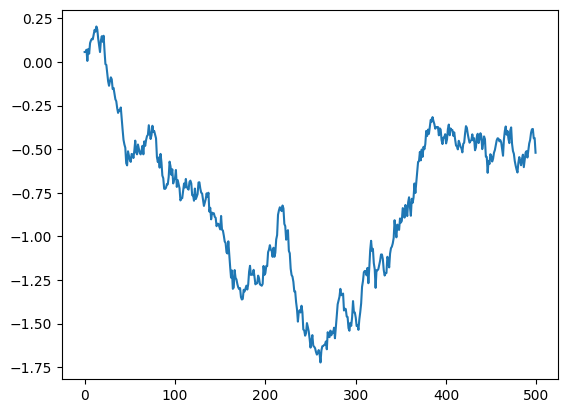

In [16]:
plt.plot(W)
plt.show()

Mô phỏng mô hình

$$X_t=e^{t+0.5B_t}$$

In [17]:
T=1
N=500
M=10000
dt=T/N
t=np.arange(0,1,dt)
dW = np.sqrt(dt)*np.random.randn(M,N)
W = np.cumsum(dW,axis=1)
U=np.exp(t+0.5*W)
Umean = np.mean(U,axis=0)

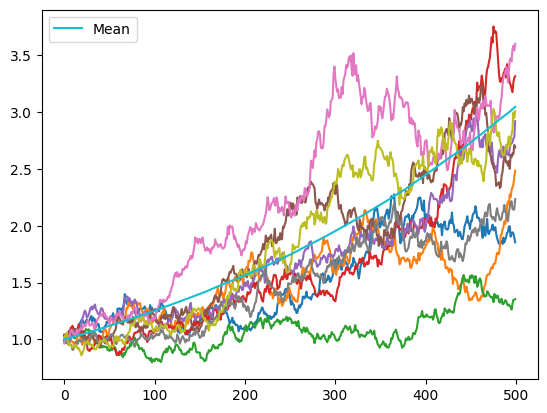

In [18]:
plt.plot(U[:9].T)
plt.plot(Umean,label="Mean")
plt.legend()
plt.show()

# Mô phỏng tích phân ngẫu nhiên

Xấp xỉ tích phân ngẫu nhiên Ito $\int^t_0h(t)dW(t)$ bởi tổng dạng

$$\sum^{N-1}_{j=0}h(t_j)(W(t_{j+1}-W(t_j)))$$

Xấp xỉ tích phân ngẫu nhiên Stratonovich  $\int^t_0h(t)\circ dW(t)$ bởi tổng dạng

$$\sum^{N-1}_{j=0}h\bigg(\frac{t_j+t_{j+1}}2\bigg)(W(t_{j+1}-W(t_j)))$$

# Mô phỏng nghiệm các phương trình vi phân ngẫu nhiên

Một phương trình vi phân ngẫu nhiên dạng
$$
dX(t)=f(X(t))dt+g(X(t))dW(t)
$$
$X(0)=X_0,0 \le t\le T$

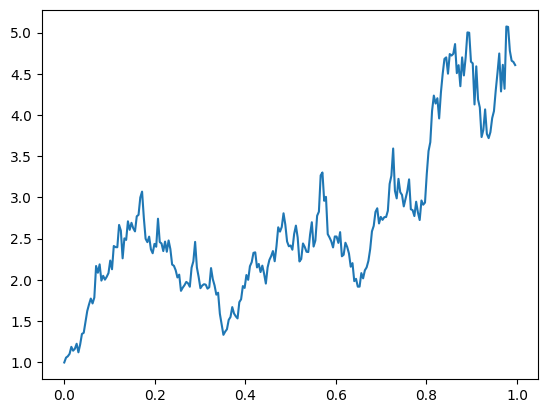

In [19]:
mu=2
si=1
Xzero = 1
T=1
N=2**8
dt=1/N
t=np.arange(0,1,dt)
dW=np.sqrt(dt)*np.random.randn(N)
W = np.cumsum(dW)
Xtrue=Xzero*np.exp((mu-0.5*si**2)*t+si*W)
plt.plot(t,Xtrue)
plt.show()

In [20]:
R = 6 # assuming L is defined
L = N // R # assuming N is a multiple of L
Dt = R*dt

Xtemp = np.zeros(L)
for j in range(L):
    Winc = np.sum(dW[R*(j-1) : R*j])
    Xtemp = Xtemp + Dt * mu * Xtemp + si * Xtemp * Winc
    Xtemp[j] = Xtemp[-1]
emerr = abs(Xtemp[-1] - Xtrue[-1])
emerr

4.606301488116912

# Mô phỏng các quá trình tài sản trong mô hình Black - Scholes

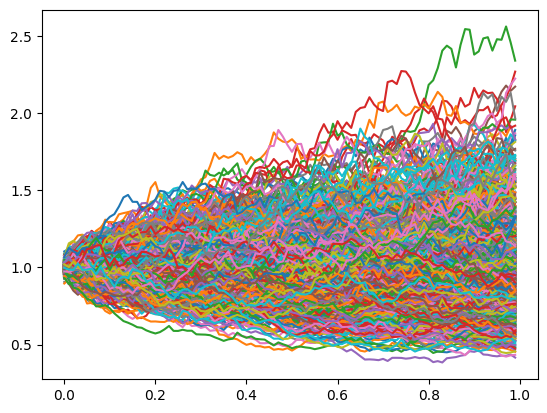

In [21]:
T=1
N=100
M=1000
dt=T/N
dW = np.sqrt(dt)*np.random.randn(M,N)
mu=0
sigma=0.3
Szero=1
Spath=Szero*np.cumprod(np.exp((mu-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*np.random.randn(M,N)),axis=1)
plt.plot(np.arange(0,1,dt),Spath.T)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9584\1067242031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(Spath.T).iloc[-1,:])


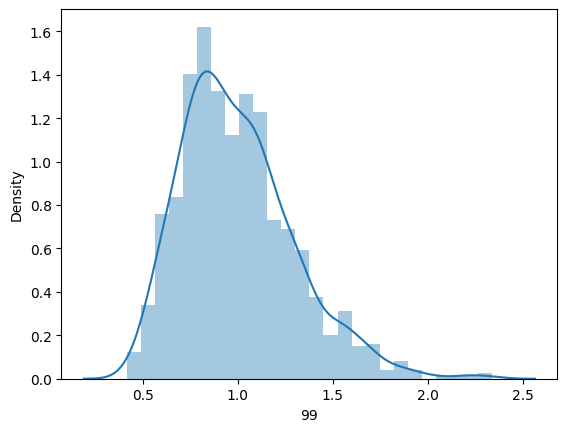

In [22]:
sns.distplot(pd.DataFrame(Spath.T).iloc[-1,:])
plt.show()

In [23]:
import math
def bsf(S,t,E,r,sigma,T):
    tau = T-t
    if tau > 0:
        d1 = (np.log(S/E)+(r+0.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
        d2 = d1-sigma*np.sqrt(tau)
        N1 = 0.5*(1+math.erf(d1/np.sqrt(2)))
        N2 = 0.5*(1+math.erf(d2/np.sqrt(2)))
        C = S*N1-E*np.exp(-r*tau)*N2
    else:
        C = max(S-E,0)
    
    return C

print(bsf(S=2,t=0,E=1,r=0.05,sigma=0.25,T=3))


1.1447424505895418
